# Project: Tumor Classification

This project aims to detect whether a tumor is benign or malignant by employing various machine learning models for binary classification.


>
##Dataset

You can find the dataset on Kaggle at this link: [Breast Cancer Wisconsin Data](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).

In this section, we will explore the data and make any necessary transformations.


### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Extra init

In [2]:
import warnings

warnings.filterwarnings("ignore")
np.random.seed(42)

Models

In [3]:
from keras import Sequential
from keras.layers import InputLayer, Dense
from sklearn import metrics

###Extract data

In [4]:
data = pd.read_csv("data.csv")

Visualize data

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


###Init transformation.



We will focus on converting the "diagnosis" column into a binary format. We will perform a simple binary conversion where "benign" will be represented as 0, and "malignant" will be represented as 1.

In [8]:
data['diagnosis'] = data['diagnosis'].replace({'M': 1, 'B': 0})

As the "Unnamed: 32" column is empty and not mentioned in the Kaggle dataset, we will proceed to drop it from our DataFrame.

In [9]:
data = data.drop(columns=['Unnamed: 32'])



Since the "id" column doesn't describe the tumor behavior and is not needed for our analysis, we will remove it from our DataFrame.

In [10]:
data = data.drop(columns=['id'])

##Prepare the data for Machine Learning algorithms

This algorithm split the data into a test and train set

In [11]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

The following code normalizes the data by first calculating the minimum and maximum values from the training set.
It then applies the same normalization process to the test set using the minimum and maximum values from the training set.

In [12]:
def Normalizar(datos, min, max):
  return (datos - min) / (max - min)

In [13]:
def Normalizar_entrenamiento(datos):
  min = datos.min().min()
  max = datos.max().max()
  datos = (datos - min) / (max - min)
  return datos, min, max

In [14]:
train_set, test_set = split_train_test(data, 0.3)

In [15]:
train_set, min, max = Normalizar_entrenamiento(train_set)
test_set = Normalizar(test_set, min, max)

The model accepts binary values (0 and 1). However, during the normalization process, the 1 values are scaled into a low value so we need to unnormalize it.


In [16]:
train_set['diagnosis'] = train_set['diagnosis'].map(lambda x: 1 if x != 0 else 0)
test_set['diagnosis'] = test_set['diagnosis'].map(lambda x: 1 if x != 0 else 0)

We are selecting the features that exhibit a strong correlation with the 'diagnosis' target variable. Specifically, we include all the features that have a correlation coefficient greater than 0.6 with 'diagnosis.'


In [17]:
corr = abs(train_set.corr()['diagnosis']).sort_values(ascending=False)
corr

diagnosis                  1.000000
concave points_worst       0.788780
concave points_mean        0.780158
perimeter_worst            0.770451
radius_worst               0.761740
perimeter_mean             0.726623
area_worst                 0.715358
radius_mean                0.712986
concavity_mean             0.689297
area_mean                  0.688223
concavity_worst            0.663614
compactness_mean           0.580517
compactness_worst          0.573100
radius_se                  0.545750
perimeter_se               0.529019
area_se                    0.512489
texture_worst              0.456741
symmetry_worst             0.434149
texture_mean               0.407407
smoothness_worst           0.406184
concave points_se          0.393858
smoothness_mean            0.357913
symmetry_mean              0.352076
fractal_dimension_worst    0.285138
compactness_se             0.267161
concavity_se               0.245461
fractal_dimension_se       0.057168
smoothness_se              0

In [18]:
features = 10
X = train_set[corr[1:features+1].index]
Y = train_set['diagnosis']

##Select and train a model

 The first model consists of two layers, where the first layer reduces the input dimensions by a factor of two, and the second layer by a factor of three. We have also switched the activation function to hyperbolic tangent (tanh).

In [19]:
def model1(neurons1 = 2, neurons2 = 3, second_layer = True):
  model = Sequential()
  model.add(InputLayer((features,)))
  model.add(Dense(int(features/neurons1), activation="tanh"))
  if second_layer:
    model.add(Dense(int(features/neurons2), activation="tanh"))
  model.add(Dense(1, activation="sigmoid"))
  model.summary()
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
  return model

The second model is designed with a single layer, which reduces the input dimensions by a factor of two. In this model, we have employed the sigmoid activation function.

In [20]:
def model2(neurons1 = 2):
  model = Sequential()
  model.add(InputLayer((features,)))
  model.add(Dense(int(features/neurons1), activation="relu"))
  model.add(Dense(1, activation="sigmoid"))
  model.summary()
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
  return model

In [21]:
modelRN1 = model1()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 55        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 77 (308.00 Byte)
Trainable params: 77 (308.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
modelRN2 = model2()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 55        
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In this example, we are training the neural network models using 20 epochs. The entire dataset is used in each batch, and 20% of the data is reserved for validation during the training process.

In [ ]:
epochs = 20 # 10 o 20, 30, 60, 70...
batch_size = 400 # 0 128, 256, 1024, 2048...
validation_split = .2

modelRN1.fit(X, Y,  epochs=epochs,  batch_size=batch_size, validation_split=validation_split, verbose=1)

In [ ]:
modelRN2.fit(X, Y,  epochs=epochs,  batch_size=batch_size, validation_split=validation_split, verbose=1)

###Preliminary Results

In [25]:
history_f1 = pd.DataFrame(modelRN1.history.history)
history_f2 = pd.DataFrame(modelRN2.history.history)

In [26]:
def ploteo(hist):
  print(hist)
  plt.figure(figsize=(16, 6))
  plt.subplot(121)
  sns.lineplot(data=hist.loc[:10, ['loss', 'val_loss']])
  plt.subplot(122)
  sns.lineplot(data=hist.loc[:30, ['binary_accuracy', 'val_binary_accuracy']]);

In [27]:
def metricas(model,x_t,y_t,label):
  probabilities = model.predict(x_t)
  predictions = (probabilities > .5).astype(float)
  print(metrics.classification_report(y_t.ravel(), predictions.ravel()))
  c = metrics.confusion_matrix(y_t, predictions)
  r = c / c.sum(axis=1).reshape(-1, 1)
  plt.figure(figsize=(10, 8))
  ax = sns.heatmap(r, linewidths=.5, cmap='YlGnBu', annot=True, fmt='.1%', xticklabels=label, yticklabels=label);

In [28]:
corr2 = abs(test_set.corr()['diagnosis']).sort_values(ascending=False)
X_test = test_set[corr2[1:features+1].index]
Y_test = test_set['diagnosis']

        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.690694         0.376176  0.689285               0.3625
1   0.689454         0.376176  0.687975               0.3625
2   0.688224         0.376176  0.686674               0.3625
3   0.687003         0.376176  0.685382               0.3625
4   0.685791         0.376176  0.684099               0.3625
5   0.684588         0.379310  0.682826               0.3625
6   0.683395         0.382445  0.681562               0.3875
7   0.682210         0.416928  0.680306               0.4000
8   0.681035         0.445141  0.679060               0.4250
9   0.679869         0.463950  0.677822               0.4750
10  0.678711         0.492163  0.676593               0.5125
11  0.677561         0.523511  0.675372               0.5750
12  0.676420         0.589342  0.674159               0.6375
13  0.675287         0.630094  0.672952               0.7000
14  0.674162         0.689655  0.671753               0.7375
15  0.673043         0.7

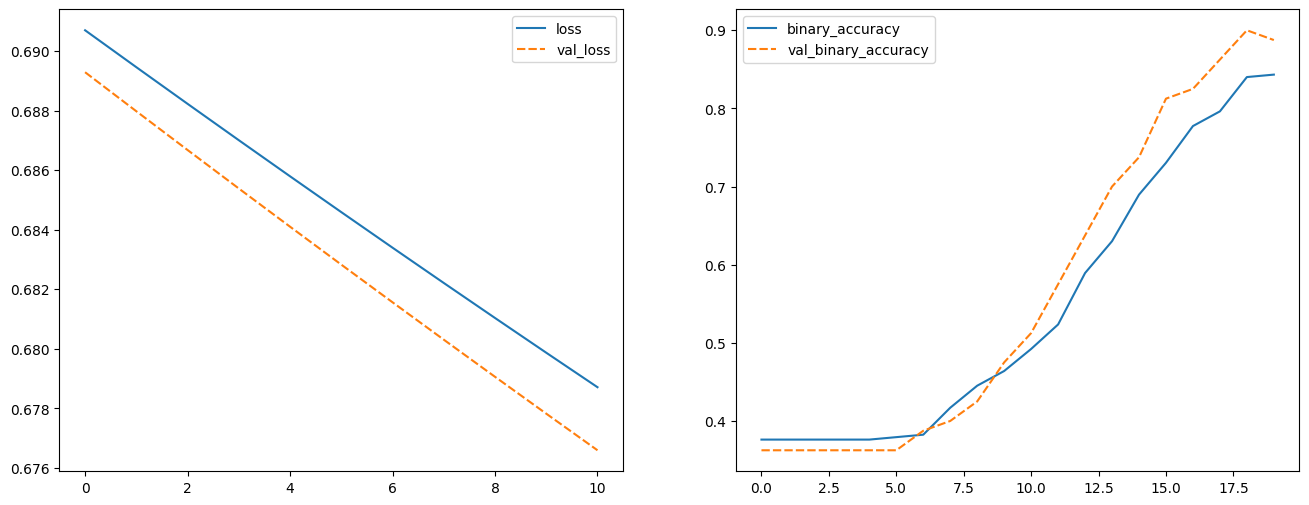

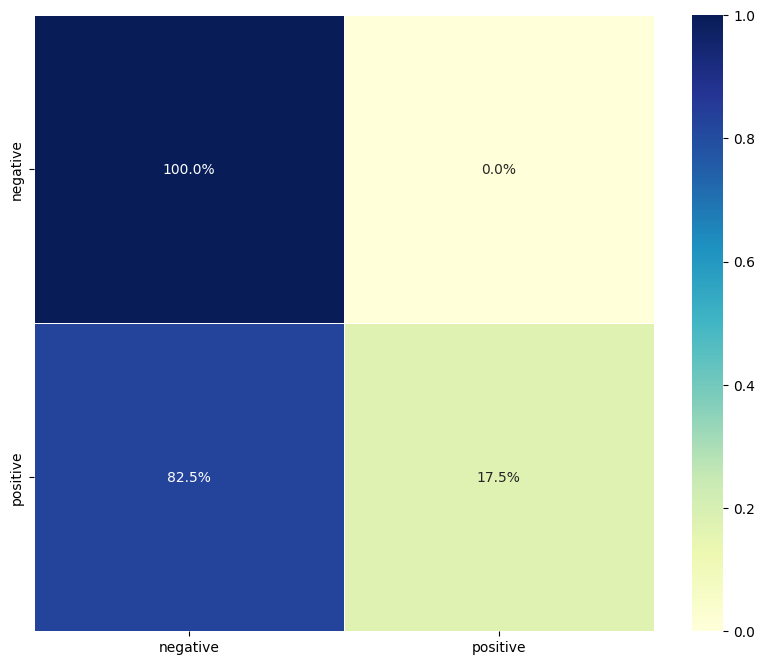

In [29]:
labels = 'negative positive'.split()

ploteo(history_f1)
metricas(modelRN1,X_test,Y_test,labels)

        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.690190         0.376176  0.689379               0.3625
1   0.689702         0.376176  0.688897               0.3625
2   0.689231         0.376176  0.688461               0.3625
3   0.688791         0.376176  0.688063               0.3625
4   0.688378         0.376176  0.687701               0.3625
5   0.688003         0.376176  0.687364               0.3625
6   0.687666         0.379310  0.687072               0.3625
7   0.687362         0.388715  0.686800               0.3875
8   0.687084         0.410658  0.686556               0.4000
9   0.686822         0.426332  0.686314               0.4250
10  0.686570         0.438871  0.686062               0.4500
11  0.686325         0.476489  0.685810               0.4750
12  0.686084         0.495298  0.685555               0.5000
13  0.685848         0.514107  0.685295               0.5125
14  0.685613         0.548589  0.685034               0.5625
15  0.685378         0.5

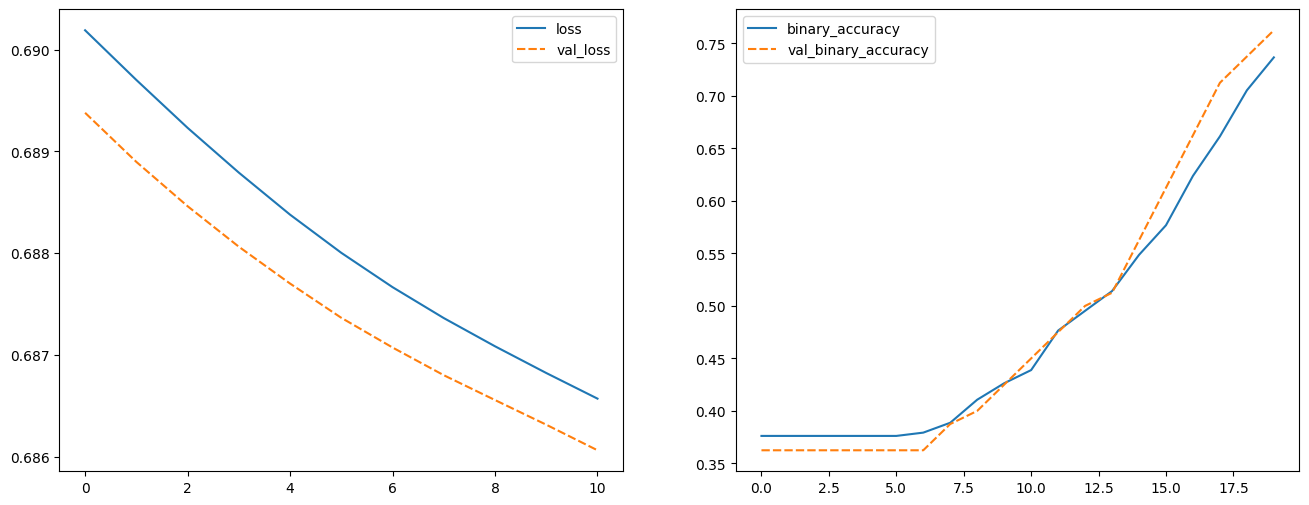

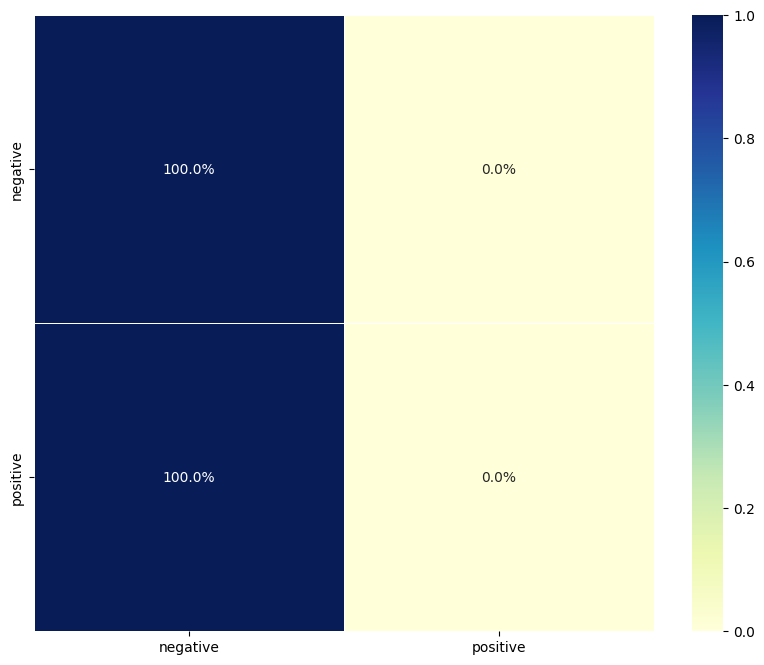

In [30]:
labels = 'negative positive'.split()

ploteo(history_f2)
metricas(modelRN2,X_test,Y_test,labels)

###Experiments

In [ ]:
X_test, X_validation = split_train_test(X_test, 0.2)
Y_test, Y_validation = split_train_test(Y_test, 0.2)

In [31]:
def experiment(features, epochs, batch_size, second_layer = True, neurons1 = 2, neurons2 = 3):
  modelRN1 = model1(second_layer = second_layer, neurons1 = neurons1, neurons2 = neurons2)
  modelRN2 = model2(neurons1 = neurons1)

  modelRN1.fit(X_test, Y_test,  epochs=epochs,  batch_size=batch_size, validation_split=validation_split, verbose=1)
  modelRN2.fit(X_test, Y_test,  epochs=epochs,  batch_size=batch_size, validation_split=validation_split, verbose=1)


  probabilities1 = modelRN1.predict(X_validation)
  predictions1 = (probabilities1 > .5).astype(float)
  f1_1 = metrics.classification_report(Y_validation.ravel(), predictions1.ravel(), output_dict = True)['weighted avg']['f1-score']

  probabilities2 = modelRN2.predict(X_validation)
  predictions2 = (probabilities2 > .5).astype(float)
  f1_2 = metrics.classification_report(Y_validation.ravel(), predictions2.ravel(), output_dict = True)['weighted avg']['f1-score']

  return f1_1, f1_2

Here is an illustrative example of how the function can be employed in a single line to obtain the F1 score for the initial experiment.

In [ ]:
f1_1,f1_2 = experiment(5,20,400,True,2,3)

First we will see how many features we need use.

In [ ]:
experiments = 10
results = []
for i in range(1,10):
  for tests in range(experiments):
    results.append(experiment(i,20,400,True,2,3))

means = []
for i in np.reshape(results,(-1,experiments,2)):
  count = [0,0]
  for j in range(experiments):
    count += i[j]
  means.append(count/experiments)

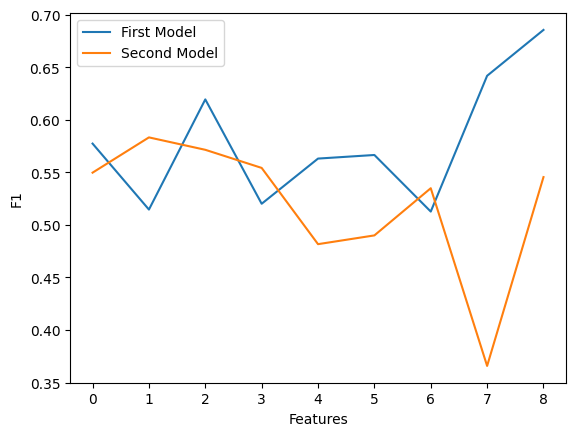

In [67]:
line1 = [point[0] for point in means]
line2 = [point[1] for point in means]

plt.plot(line1, label='First Model')
plt.plot(line2, label='Second Model')

plt.xlabel('Features')
plt.ylabel('F1')
plt.legend()

plt.show()

Results: 1-6 features could have a stable performance.

So we select the mean: 3

In [ ]:
experiments = 10
results = []
for i in range(5,20,2):
  for tests in range(experiments):
    results.append(experiment(3,i,400,True,2,3))

means = []
for i in np.reshape(results,(-1,experiments,2)):
  count = [0,0]
  for j in range(experiments):
    count += i[j]
  means.append(count/experiments)

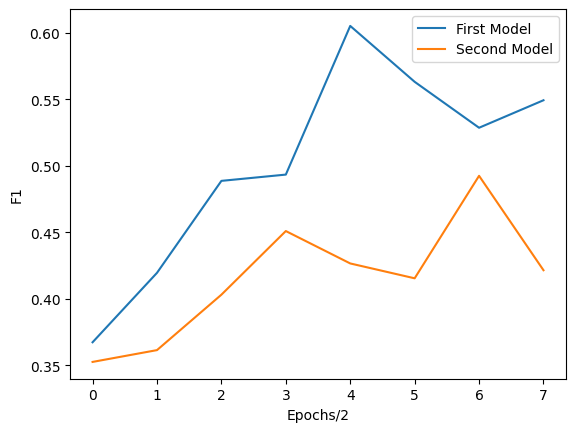

In [79]:
line1 = [point[0] for point in means]
line2 = [point[1] for point in means]

plt.plot(line1, label='First Model')
plt.plot(line2, label='Second Model')

plt.xlabel('Epochs/2')
plt.ylabel('F1')
plt.legend()

plt.show()

Result: Linear till 6.

So we select 6*2 = 12

In [ ]:
experiments = 10
results = []
for i in range(100,401,50):
  for tests in range(experiments):
    results.append(experiment(3,12,i,True,2,3))

means = []
for i in np.reshape(results,(-1,experiments,2)):
  count = [0,0]
  for j in range(experiments):
    count += i[j]
  means.append(count/experiments)

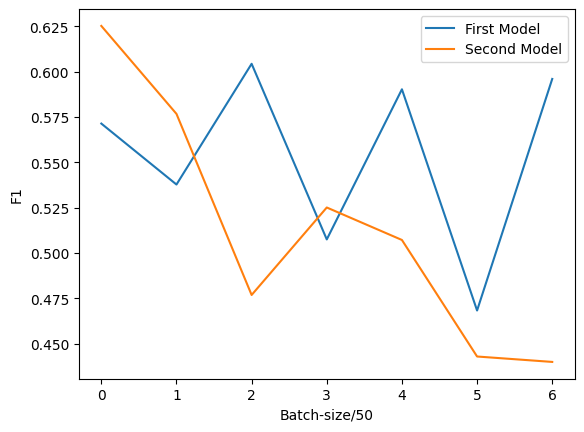

In [84]:
line1 = [point[0] for point in means]
line2 = [point[1] for point in means]

plt.plot(line1, label='First Model')
plt.plot(line2, label='Second Model')

plt.xlabel('Batch-size/50')
plt.ylabel('F1')
plt.legend()

plt.show()

Results: It appears that using smaller batch sizes results in better performance.

So, we will use a batch of 50


Now, we will test the second model and how the arquitecture impact in the performance

In [ ]:
experiments = 10
results = []
for i in [True,False]:
  for tests in range(experiments):
    results.append(experiment(3,12,50,i,2,3))

means = []
for i in np.reshape(results,(-1,experiments,2)):
  count = [0,0]
  for j in range(experiments):
    count += i[j]
  means.append(count/experiments)

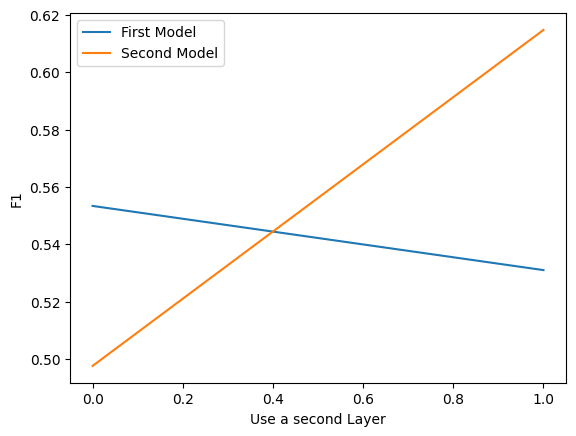

In [110]:
line1 = [point[0] for point in means]
line2 = [point[1] for point in means]

plt.plot(line1, label='First Model')
plt.plot(line2, label='Second Model')

plt.xlabel('Use a second Layer')
plt.ylabel('F1')
plt.legend()

plt.show()

Both models exhibit poor performance, with an F1 score of less than 0.6, indicating that the models cannot make predictions as desired.

Therefore, we decide to continue experimenting with a model that has 2 layers.

In [ ]:
experiments = 10
results = []
for i in list(np.arange(1.1, 2.1, 0.1)):
  for tests in range(experiments):
    results.append(experiment(3,12,50,True,i,3))

means = []
for i in np.reshape(results,(-1,experiments,2)):
  count = [0,0]
  for j in range(experiments):
    count += i[j]
  means.append(count/experiments)

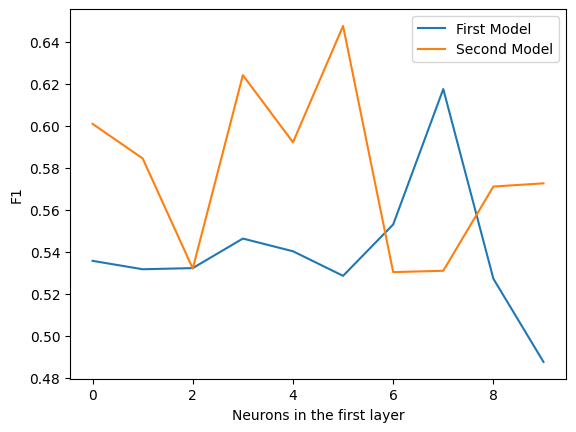

In [103]:
line1 = [point[0] for point in means]
line2 = [point[1] for point in means]

plt.plot(line1, label='First Model')
plt.plot(line2, label='Second Model')

plt.xlabel('Neurons in the first layer')
plt.ylabel('F1')
plt.legend()

plt.show()

The performance is maintained among the most of values.

So we will choose just 2 (by default)

In [ ]:
experiments = 10
results = []
for i in list(np.arange(2.1, 3.1, 0.1)):
  for tests in range(experiments):
    results.append(experiment(3,12,50,True,2,i))

means = []
for i in np.reshape(results,(-1,experiments,2)):
  count = [0,0]
  for j in range(experiments):
    count += i[j]
  means.append(count/experiments)

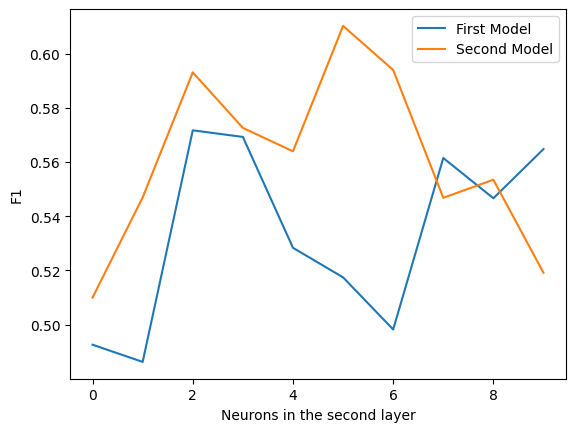

In [101]:
line1 = [point[0] for point in means]
line2 = [point[1] for point in means]

plt.plot(line1, label='First Model')
plt.plot(line2, label='Second Model')

plt.xlabel('Proportion of neurons in the second layer')
plt.ylabel('F1')
plt.legend()

plt.show()

Finally we can see that both don't show a expected performance.

So also we just choose by default.

In [108]:
modelRN1 = model1(second_layer = True, neurons1 = 2, neurons2 = 3)

modelRN1.fit(X, Y,  epochs=12,  batch_size=50, validation_split=.2, verbose=1)


probabilities1 = modelRN1.predict(X_test)
predictions1 = (probabilities1 > .5).astype(float)
metrics.classification_report(Y_test.ravel(), predictions1.ravel(), output_dict = True)['weighted avg']['f1-score']

Model: "sequential_1565"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3894 (Dense)          (None, 5)                 55        
                                                                 
 dense_3895 (Dense)          (None, 3)                 18        
                                                                 
 dense_3896 (Dense)          (None, 1)                 4         
                                                                 
Total params: 77 (308.00 Byte)
Trainable params: 77 (308.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/12
7/7 [==============================] - 14s 52ms/step - loss: 0.6964 - binary_accuracy: 0.6238 - val_loss: 0.6943 - val_binary_accuracy: 0.6375
Epoch 2/12
7/7 [==============================] - 0s 15ms/step - loss: 0.6942 - binary_accuracy: 0.6238 - val_loss: 0.6920 - 

0.7285134159871602